In [1]:
import matplotlib.pyplot as plt

def display_mses(layer, y_lim):
    mse = layer.mse

    plt.figure(figsize=(15, 5))

    for index in range((len(mse))):
        plt.subplot((len(mse) // 3) + 1, 3, index + 1)
        plt.plot(range(len(mse[index])), mse[index])
        plt.ylim(0, y_lim)
        plt.grid()

# Monolayer Perceptron

## Monolayer Perceptron learning table 3.1

### Import data and show graph

Text(0, 0.5, 'x2')

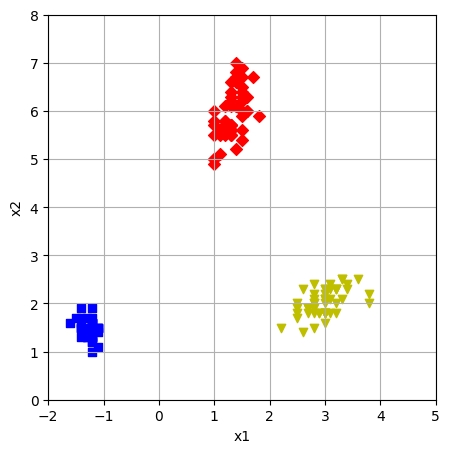

In [2]:
import quark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/table_3_1.csv", header=None)

samplesTab = df[[0, 1]].values
labelsTab = df[[2, 3, 4]].values

def get_category(d1, d2, d3):
    if d1 == 1 and d2 == -1 and d3 == -1:
        return 0
    if d1 == -1 and d2 == 1 and d3 == -1:
        return 1
    if d1 == -1 and d2 == -1 and d3 == 1:
        return 2
    raise Exception("Bad Input")

color_map = np.array(['b', 'r', 'y'])
marker_map = np.array(['s', 'D', 'v'])

categories = [get_category(y[0], y[1], y[2]) for y in labelsTab]

datazip = zip(samplesTab[:,0], samplesTab[:,1], marker_map[categories], color_map[categories])

plt.figure(figsize=(5, 5))

for x1, x2, marker, color in datazip:
    plt.scatter(x1, x2, marker=marker, color=color)
    
plt.xlim(-2, 5)
plt.ylim(0, 8)
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")

### Monolayer Perceptron learning

In [3]:
samples = samplesTab.tolist()
labels = labelsTab.tolist()

monolayer = quark.Layer("Adaline", 3, 2, 0.001, "Step")
monolayer.train(samples, labels)

### Get the weights

In [4]:
wt = monolayer.weights
wt
#Each row is a neuron

[[0.6875085659165678, -0.440747646411178, -0.17951322864005526],
 [-1.7449209132028007, -0.06581579583855542, 0.46535935174825616],
 [0.05741234728623524, 0.5065634422497334, -0.28584612310820173]]

### Create lines for the graph

In [5]:
x = np.linspace(-2, 5, 50)

y1 = -wt[0][1] / wt[0][2] * x - wt[0][0] / wt[0][2] #Neuron 1
y2 = -wt[1][1] / wt[1][2] * x - wt[1][0] / wt[1][2] #Neuron 2
y3 = -wt[2][1] / wt[2][2] * x - wt[2][0] / wt[2][2] #Neuron 3

### Add lines to graph

Text(0, 0.5, 'x2')

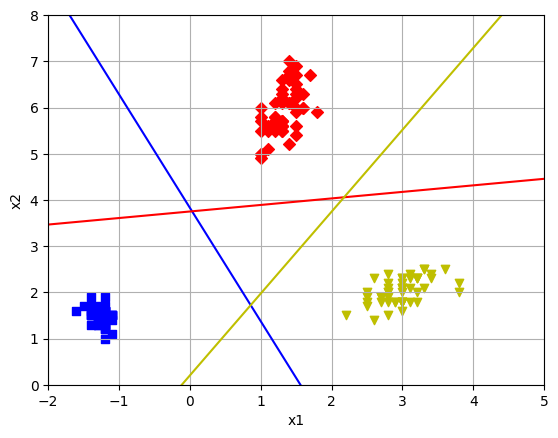

In [6]:
plt.plot(x, y1, color='b')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='y')

for x1, x2, marker, color in zip(samplesTab[:,0], samplesTab[:,1], marker_map[categories], color_map[categories]):
    plt.scatter(x1, x2, marker=marker, color=color)

plt.grid()
plt.xlim(-2, 5)
plt.ylim(0, 8)


plt.xlabel("x1")
plt.ylabel("x2")

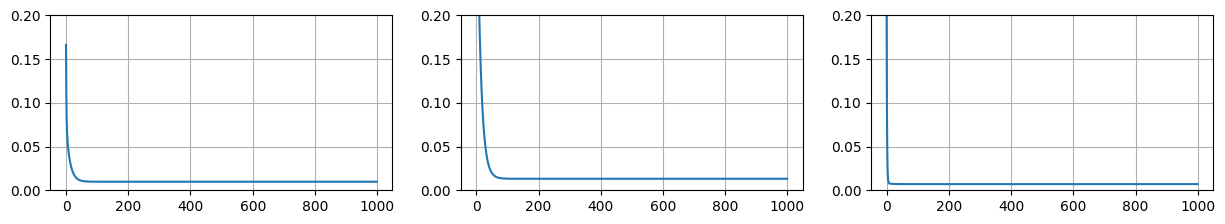

In [7]:
display_mses(monolayer, 0.2)

### Predictions

In [8]:
predictionBlue = monolayer.predict([-1, 1])
predictionBlue
#First number is > 0 => Correctly classified

[1.0, -1.0, -1.0]

In [9]:
predictionRed = monolayer.predict([1, 6])
predictionRed
#Second number is > 0 => Correctly classified

[-1.0, 1.0, -1.0]

In [10]:
predictionYellow = monolayer.predict([3, 2])
predictionYellow
#Third number is > 0 => Correctly classified

[-1.0, -1.0, 1.0]

In [11]:
predictionImpossible = monolayer.predict([1, 3])
predictionImpossible
#All numbers are negative => Correctly classified

[-1.0, -1.0, -1.0]

## Monolayer Perceptron learning table 3.5

In [12]:
import quark
import pandas as pd

df = pd.read_csv("datasets/table_3_5.csv", header=None)

samplesTab = df.head()
labelsTab = df.head()
for i in range(0, 25):
    labelsTab.pop(i)
for i in range(25, 29):
    samplesTab.pop(i)
    
samples = samplesTab.values.tolist()
labels = labelsTab.values.tolist()
    
monolayer = quark.Layer("Adaline", 4, 25, 0.001, "Step")
monolayer.train(samples, labels, 1000)

lp1 = monolayer.predict([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
lp2 = monolayer.predict([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
print(f"Should be 1st category: {lp1}")
print(f"Should be 1st category: {lp2}")

lp3 = monolayer.predict([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])
lp4 = monolayer.predict([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(f"Should be 2nd category: {lp3}")
print(f"Should be 2nd category: {lp4}")

lp5 = monolayer.predict([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
lp6 = monolayer.predict([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1])
print(f"Should be 3rd category: {lp5}")
print(f"Should be 3rd category: {lp6}")


lp7 = monolayer.predict([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])
lp8 = monolayer.predict([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])
print(f"Should be 4th category: {lp7}")
print(f"Should be 4th category: {lp8}")

Should be 1st category: [1.0, -1.0, -1.0, -1.0]
Should be 1st category: [1.0, -1.0, -1.0, -1.0]
Should be 2nd category: [-1.0, 1.0, -1.0, -1.0]
Should be 2nd category: [-1.0, 1.0, -1.0, -1.0]
Should be 3rd category: [-1.0, -1.0, 1.0, -1.0]
Should be 3rd category: [-1.0, -1.0, 1.0, -1.0]
Should be 4th category: [-1.0, -1.0, -1.0, 1.0]
Should be 4th category: [-1.0, -1.0, -1.0, 1.0]


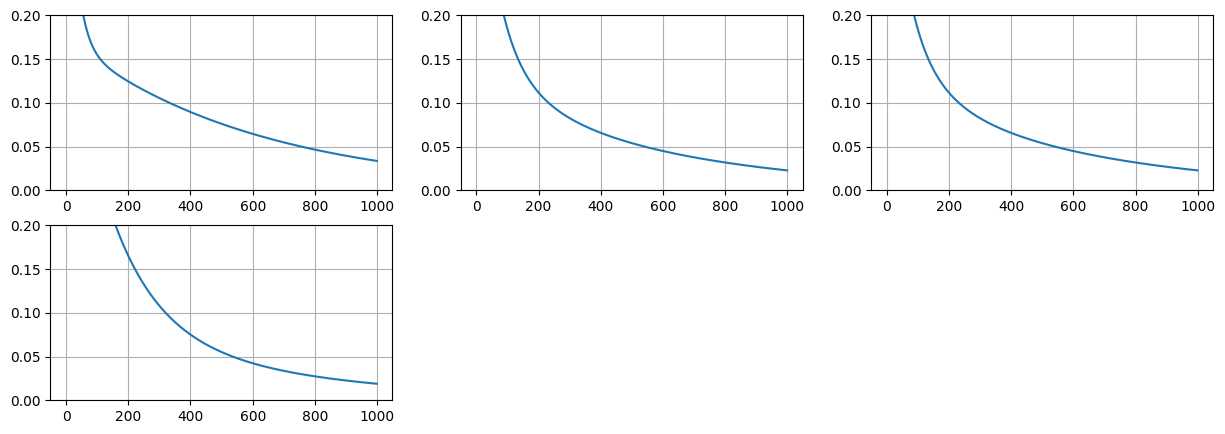

In [13]:
display_mses(monolayer, 0.2)